In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#Esto es una prueba



In [15]:
#Reading the file and showing the first 5 rows
df = pd.read_csv("shein_mens_fashion.csv")

#Observamos que tenemos 1000 entradas filas (o productos distintos) y 15 variables, cuyos tipos son coherentes con lo que representan
print(df.shape)
print(df.info())
df.head()


(1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       1000 non-null   int64  
 1   sku                              1000 non-null   object 
 2   url                              1000 non-null   object 
 3   title                            1000 non-null   object 
 4   color                            1000 non-null   object 
 5   sale_price/amount                1000 non-null   float64
 6   sale_price/amount_with_symbol    1000 non-null   object 
 7   retail_price/amount              1000 non-null   float64
 8   retail_price/amount_with_symbol  1000 non-null   object 
 9   discount_percentage              1000 non-null   int64  
 10  category_name                    1000 non-null   object 
 11  category_id                      1000 non-null   int64  
 12  descriptio

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men Plus Size T-Shirt Co-ords,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Navy Blue,6.15,$6.15,14.29,$14.29,57,Men Sweatpants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Apricot,13.19,$13.19,14.99,$14.99,12,Men Plus Size Polo Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Heather Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00


In [16]:
#Observamos que no hay valores nulos en ninguna columna
df.isnull().sum()


product_id                         0
sku                                0
url                                0
title                              0
color                              0
sale_price/amount                  0
sale_price/amount_with_symbol      0
retail_price/amount                0
retail_price/amount_with_symbol    0
discount_percentage                0
category_name                      0
category_id                        0
description                        0
reviews_count                      0
average_rating                     0
dtype: int64

CODIFICACIÓN DE VARIABLES

In [17]:
df["color"].value_counts()

color
Black                              196
Multicolor                         149
White                              104
Khaki                               67
Apricot                             31
Grey                                31
Navy Blue                           29
Dark Grey                           29
Army Green                          26
Blue                                22
Light Wash                          20
Green                               20
Black and White                     19
Light Grey                          18
Pink                                17
Beige                               16
Burgundy                            15
Red                                 14
Dusty Blue                          13
Baby Blue                           12
Dark Green                          12
Brown                               12
Mint Green                          11
Medium Wash                         10
Coffee Brown                         9
Blue and White     

In [18]:
df["color"].value_counts()
# Crear el diccionario de mapeo de colores
color_mapping = {
    'Black': 'Black',
    'Multicolor': 'Multicolor',
    'White': 'White',
    'Khaki': 'Beige',
    'Apricot': 'Beige',
    'Grey': 'Gray',
    'Navy Blue': 'Blue',
    'Dark Grey': 'Gray',
    'Army Green': 'Green',
    'Blue': 'Blue',
    'Light Wash': 'Blue',
    'Green': 'Green',
    'Black and White': 'Black & White',
    'Light Grey': 'Gray',
    'Pink': 'Pink',
    'Beige': 'Beige',
    'Burgundy': 'Red',
    'Red': 'Red',
    'Dusty Blue': 'Blue',
    'Baby Blue': 'Blue',
    'Dark Green': 'Green',
    'Brown': 'Brown',
    'Mint Green': 'Green',
    'Medium Wash': 'Blue',
    'Coffee Brown': 'Brown',
    'Blue and White': 'Blue',
    'Dark Wash': 'Blue',
    'Heather Black': 'Gray',
    'Yellow': 'Yellow',
    'Royal Blue': 'Blue',
    'Baby Pink': 'Pink',
    'Camel': 'Beige',
    'Orange': 'Orange',
    'Burnt Orange': 'Orange',
    'Dusty Pink': 'Pink',
    'Chocolate Brown': 'Brown',
    'Mint Blue': 'Blue',
    'Violet Purple': 'Purple',
    'Hot Pink': 'Pink',
    'Mauve Purple': 'Purple',
    'Purple': 'Purple',
    'Teal Blue': 'Blue',
    'Bronze': 'Brown',
    'Heather Navy': 'Blue',
    'Heather Green': 'Green',
    'Heather Navy - UNIPORN': 'Blue',
    'Heather Red - DICKENS': 'Red',
    'Light Heather Blue - PEN': 'Blue',
    'Heather Navy - Kid Has Practice': 'Blue',
    'Mustard Yellow': 'Yellow',
    'Dark Heather Grey': 'Gray',
    'Coral Pink': 'Pink',
    'Heather Red': 'Red',
    'Light Heather Grey': 'Gray',
    'Heather Navy - MATH': 'Blue',
    'Heather Black - 100% Chance': 'Gray',
    'Dark Heather Grey - BOOK': 'Gray',
    'Heather Light Blue': 'Blue',
    'Red and White': 'Red',
    'Lilac Purple': 'Purple'
}

df['color'] = df['color'].replace(color_mapping)


In [19]:
df["category_name"].value_counts()

category_name
Men T-Shirts                                 224
Men Shirts                                    81
Men Shorts                                    78
Men Polo Shirts                               69
Men Jeans                                     66
Men Beach Shorts                              63
Men T-Shirt Co-ords                           57
Men Pants                                     55
Men Shirt Co-ords                             35
Men Sweatpants                                33
Men Plus Size T-Shirts                        25
Men Hoodies                                   22
Men Plus Size Shirts                          19
Men Sweatshirts                               16
Men Plus Size T-Shirt Co-ords                 15
Men Plus Size Shirt Co-ords                   15
Men Jackets & Coats                           15
Men Suits                                     10
Men Suit Pants                                10
Men Hoodie & Sweatshirt Co-ords                9
Men Sw

In [20]:
category_map = {
    'Men T-Shirts': 'Men T-Shirts',
    'Men Shirts': 'Men Shirts',
    'Men Polo Shirts': 'Men T-Shirts',
    'Men Jeans': 'Men Jeans',
    'Men Beach Shorts': 'Men Shorts',
    'Men T-Shirt Co-ords': 'Men T-Shirts',
    'Men Pants': 'Men Pants',
    'Men Shirt Co-ords': 'Men Shirts',
    'Men Sweatpants': 'Men Pants',
    'Men Plus Size T-Shirts': 'Men T-Shirts',
    'Men Hoodies': 'Men Hoodies',
    'Men Plus Size Shirts': 'Men Shirts',
    'Men Sweatshirts': 'Men Hoodies',
    'Men Plus Size T-Shirt Co-ords': 'Men T-Shirts',
    'Men Plus Size Shirt Co-ords': 'Men Shirts',
    'Men Jackets & Coats': 'Men Jackets & Coats',
    'Men Suits': 'Men Suits',
    'Men Suit Pants': 'Men Suits',
    'Men Hoodie & Sweatshirt Co-ords': 'Men Hoodies',
    'Men Sweaters': 'Men Sweaters',
    'Men Plus Size Polo Shirts': 'Men T-Shirts',
    'Men Zip-up Hoodies': 'Men Hoodies',
    'Men Tank Tops': 'Men Tank Tops',
    'Men Plus Size Suits': 'Men Suits',
    'Men Denim Shorts': 'Men Shorts',
    'Men Plus Size Shorts': 'Men Shorts',
    'Men Plus Size Jackets & Coats': 'Men Jackets & Coats',
    'Men Plus Size Pants': 'Men Pants',
    'Men Blazers': 'Men Blazers',
    'Men Plus Size Jeans': 'Men Jeans',
    'Men Denim Shirts': 'Men Shirts',
    'Men Plus Size Beach Shorts': 'Men Shorts',
    'Men Knit Tops': 'Men Tops',
    'Men Outerwear Co-ords': 'Men Outerwear',
    'Men Denim Jackets': 'Men Jackets & Coats',
    'Men Plus Size Hoodies': 'Men Hoodies',
    'Men Plus Size Hoodie & Sweatshirt Co-ords': 'Men Hoodies',
    'Men Plus Size Polo Co-ords': 'Men T-Shirts',
    'Men Plus Size Blazers': 'Men Blazers',
    'Men Overcoats': 'Men Outerwear',
    'Men Winter Coats': 'Men Outerwear',
    'Men Plus Size Denim Shirts': 'Men Shirts',
    'Men Polo Co-ords': 'Men T-Shirts',
    'Men Plus Size Sweatshirts': 'Men Hoodies',
    'Men Plus Size Tank Tops': 'Men Tank Tops',
    'Men Plus Size Outerwear Co-ords': 'Men Outerwear',
    'Men Cardigans': 'Men Outerwear',
    'Men Shackets': 'Men Outerwear',
    'Men Plus Size Trench Coats': 'Men Outerwear'
}

# Reemplazar las categorías en la columna 'category_name' usando el diccionario
df['category_name'] = df['category_name'].replace(category_map)

# Verificar el conteo de las categorías después de la agrupación
df['category_name'].value_counts()

category_name
Men T-Shirts           399
Men Shorts             153
Men Shirts             153
Men Pants               92
Men Jeans               69
Men Hoodies             58
Men Suits               25
Men Jackets & Coats     21
Men Sweaters             8
Men Outerwear            8
Men Tank Tops            7
Men Blazers              5
Men Tops                 2
Name: count, dtype: int64

In [21]:
df.head(5)

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
0,22039173,sm2307273039173611,https://us.shein.com/Manfinity-Homme-Men-Plus-...,Manfinity Homme Men Plus Solid Tee & Shorts,White,18.74,$18.74,26.39,$26.39,29,Men T-Shirts,6317,Color: White\nStyle: Casual\nPattern Type: Pla...,64,4.98
1,24808563,rm2308169291469282,https://us.shein.com/ROMWE-Street-Life-Men-Let...,ROMWE Street Life Men's Short Sleeve T-Shirt W...,Black,9.24,$9.24,12.49,$12.49,26,Men T-Shirts,1980,Color: Black\nStyle: Casual\nPattern Type: Car...,100,4.95
2,23321220,sm2309079942461816,https://us.shein.com/Manfinity-Men-Contrast-Pa...,Manfinity Men Contrast Panel Drawstring Sweatp...,Blue,6.15,$6.15,14.29,$14.29,57,Men Pants,2988,Color: Navy Blue\nPattern Type: Colorblock\nDe...,1000,4.87
3,27635772,sm2311021427722837,https://us.shein.com/Manfinity-Homme-Men-s-Plu...,Manfinity Homme Men's Plus Size Striped Trim S...,Beige,13.19,$13.19,14.99,$14.99,12,Men T-Shirts,6307,Color: Apricot\nStyle: Casual\nPattern Type: P...,24,4.92
4,30885163,sm2403027733789007,https://us.shein.com/Mens-Fitness-Taco-Funny-T...,Mens Fitness Taco Funny T Shirt Humorous Gym G...,Red,11.99,$11.99,11.99,$11.99,0,Men T-Shirts,1980,Color: Heather Red\nStyle: Casual\nLength: Reg...,0,0.00


ANÁLISIS INICIAL DE POPULARIDAD

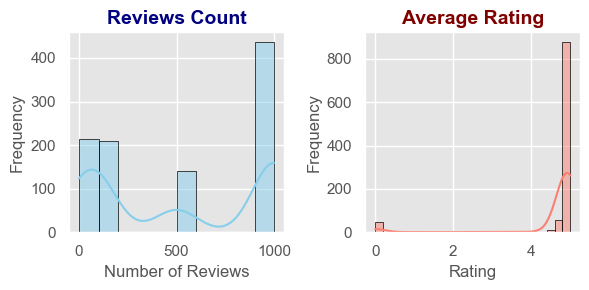

In [22]:
# Crear el objeto de figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Histograma para "reviews_count"
sns.histplot(data=df, x="reviews_count", bins=10, ax=axs[0], color='skyblue', edgecolor='black', kde=True)
axs[0].set_title("Reviews Count", fontsize=14, fontweight='bold', color='navy')
axs[0].set_xlabel("Number of Reviews", fontsize=12)
axs[0].set_ylabel("Frequency", fontsize=12)

# Histograma para "average_rating"
sns.histplot(data=df, x="average_rating", bins=25, ax=axs[1], color='salmon', edgecolor='black', kde=True)
axs[1].set_title("Average Rating", fontsize=14, fontweight='bold', color='maroon')
axs[1].set_xlabel("Rating", fontsize=12)
axs[1].set_ylabel("Frequency", fontsize=12)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

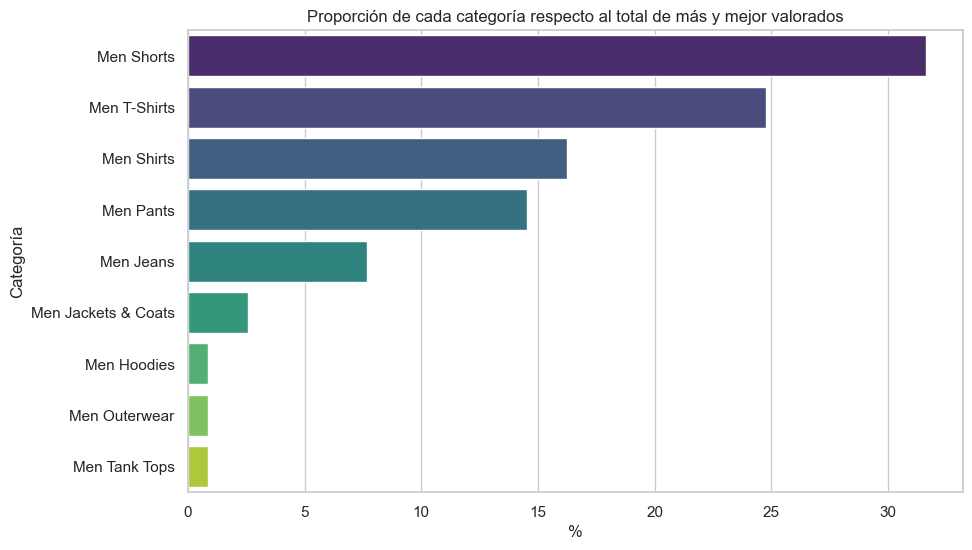

In [23]:
proporciones_respecto_total=df.loc[(df["average_rating"] == 5) & (df["reviews_count"] >= 1000)].value_counts("category_name", normalize=True)

# Configura el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Datos de ejemplo: las proporciones respecto al total
df_proporciones = proporciones_respecto_total.reset_index()
df_proporciones.columns = ['category_name', 'proportion']
df_proporciones["proportion"]=df_proporciones["proportion"]*100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_proporciones, x='proportion', y='category_name', hue="category_name", legend = False, palette='viridis')

# Etiquetas y título
plt.xlabel('%')
plt.ylabel('Categoría')
plt.title('Proporción de cada categoría respecto al total de más y mejor valorados')
plt.show()




In [24]:

df.sort_values(by="average_rating", ascending=False)
df.loc[(df["average_rating"]>1) & (df["average_rating"]<2.5) & (df["reviews_count"]>0)].head()

,product_id,sku,url,title,color,sale_price/amount,sale_price/amount_with_symbol,retail_price/amount,retail_price/amount_with_symbol,discount_percentage,category_name,category_id,description,reviews_count,average_rating
898,28627364,sm2311174494418818,https://us.shein.com/Manfinity-Hypemode-Men-S-...,Manfinity Hypemode Men'S Plus Size Color-Block...,Multicolor,11.5,$11.50,18.79,$18.79,39,Men Jackets & Coats,6300,Color: Multicolor\nStyle: Casual\nPattern Type...,1,2.0


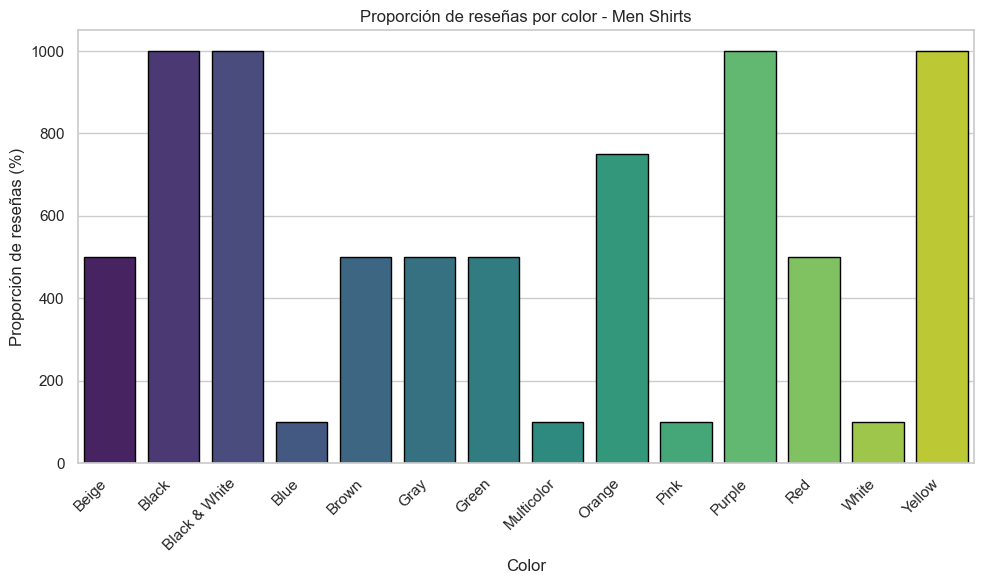

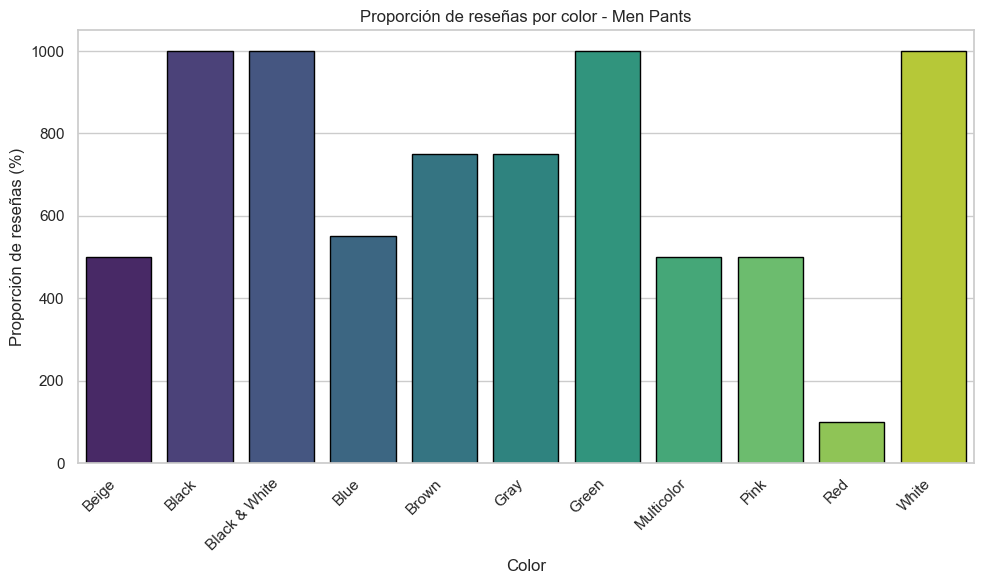

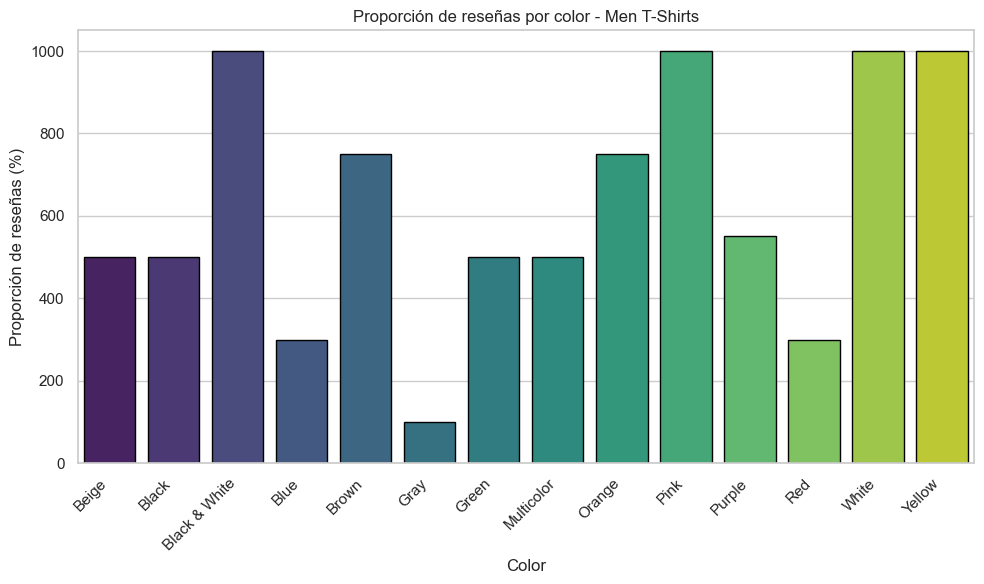

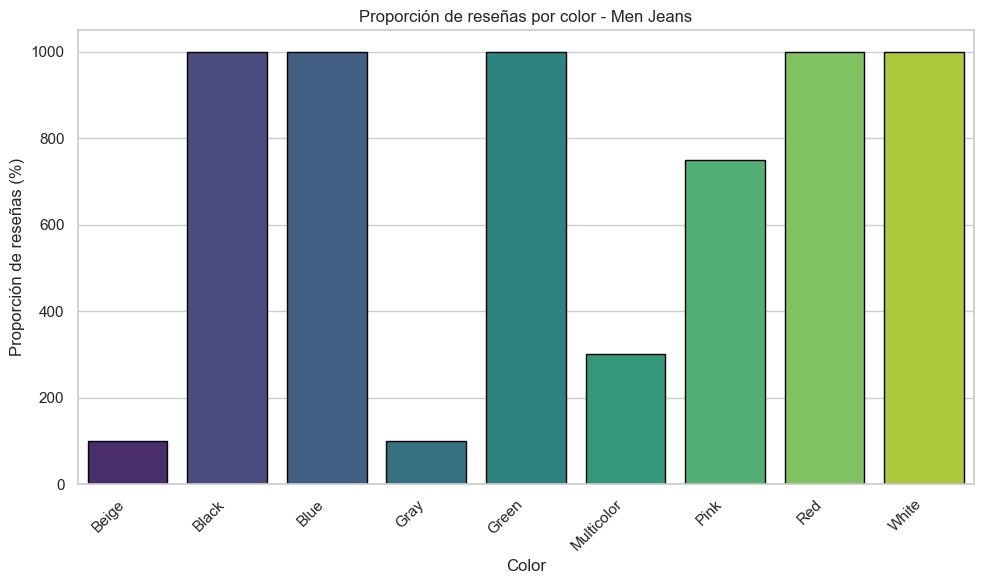

In [25]:
# Paso 1: Filtrar el DataFrame para incluir solo las categorías deseadas
categorias_interes = ['Men Shirts', 'Men Pants', 'Men T-Shirts', "Men Jeans"]
df_filtrado = df[df['category_name'].isin(categorias_interes)]

# Paso 2: Agrupar por 'category_name' y 'color' y obtener el total de reviews_count por grupo
conteo_por_categoria_y_color = df_filtrado.groupby(["category_name", "color"])["reviews_count"].median().reset_index(name='total_reviews')
conteo_por_categoria_y_color

# Crear gráficos para cada categoría
for categoria in categorias_interes:
          
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=conteo_por_categoria_y_color.loc[conteo_por_categoria_y_color["category_name"]==categoria], x='color', y="total_reviews",hue="color", legend=False, palette='viridis', edgecolor='black')

    # Etiquetas y título
    plt.xlabel('Color')
    plt.ylabel('Proporción de reseñas (%)')
    plt.title(f'Proporción de reseñas por color - {categoria}')

    # Rotar etiquetas del eje x para mejor visibilidad
    plt.xticks(rotation=45, ha='right')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

C:\Users\saezg\AppData\Local\Temp\ipykernel_14428\631198875.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categoria_data, x='color', y='correlacion', palette='viridis')


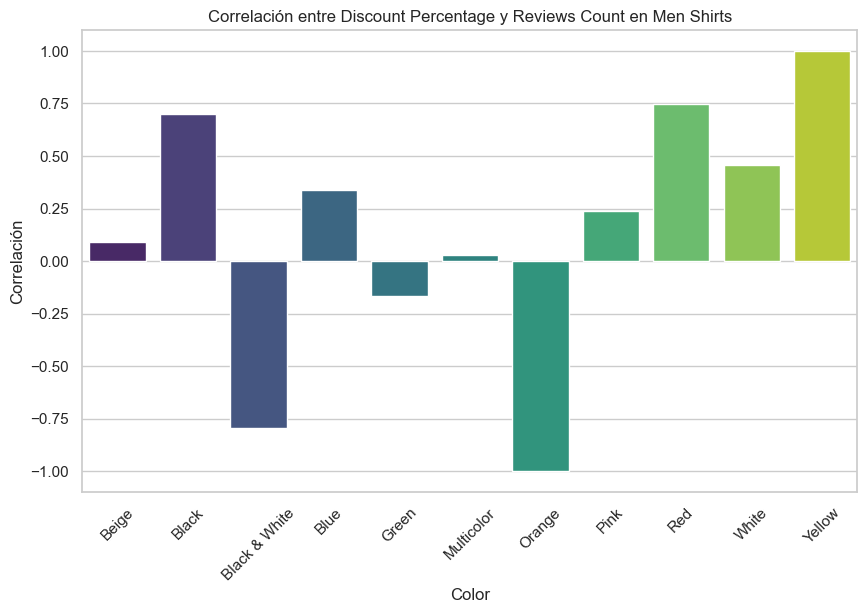

In [26]:
# Crear una copia del DataFrame original
df2 = df.copy()

# Reemplazar los ceros en 'reviews_count' por 1
df2['reviews_count'] = df2['reviews_count'].replace(0, 1)

# Filtrar los grupos con más de 1 elemento
df_filtered = df2.groupby(['category_name', 'color']).filter(lambda x: len(x) > 1)

# Filtrar grupos con variabilidad en ambas columnas (al menos 2 valores distintos)
df_filtered = df_filtered.groupby(['category_name', 'color']).filter(
    lambda x: x['discount_percentage'].nunique() > 1 and x['reviews_count'].nunique() > 1
)

# Usar agg en lugar de apply para evitar la deprecación
correlaciones = df_filtered.groupby(['category_name', 'color']).agg(
    correlacion=('discount_percentage', lambda x: x.corr(df_filtered.loc[x.index, 'reviews_count']))
).reset_index()

# Eliminar los valores NaN (si los hay)
correlaciones = correlaciones.dropna()

# Ver los resultados
correlaciones

# Obtener las categorías únicas
categorias = ["Men Shirts"]

# Iterar sobre cada categoría y crear un gráfico independiente
for categoria in categorias:
    # Filtrar los datos para la categoría actual
    categoria_data = correlaciones[correlaciones['category_name'] == categoria]
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=categoria_data, x='color', y='correlacion', palette='viridis')
    
    # Agregar título y etiquetas
    plt.title(f'Correlación entre Discount Percentage y Reviews Count en {categoria}')
    plt.xlabel('Color')
    plt.ylabel('Correlación')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que se lean bien
    
    # Mostrar el gráfico
    plt.show()